In [5]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
from scipy.stats import shapiro, spearmanr,chi2_contingency,ttest_ind
from sklearn.datasets import load_wine,make_classification
import warnings
warnings.filterwarnings("ignore")



In [6]:
wine = load_wine()

In [7]:
dir(wine)

['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']

In [11]:
wine_df = pd.DataFrame(wine.data, columns=wine.feature_names)
wine_df["target"]=wine.target

In [12]:
data,target = make_classification(n_samples=400,n_features=5,n_classes=2)

In [13]:
df = pd.DataFrame(data, columns=[f"feature{1}" for i in range(1,6)])
df["target"]=target

In [14]:
wine = wine_df.copy()

In [15]:
wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [16]:
df.head()

,feature1,feature1,feature1,feature1,feature1,target
0,1.514783,-1.581492,0.835035,-0.246134,0.250105,0
1,0.419889,-0.397374,0.278522,-0.219484,0.285595,0
2,-0.598470,0.489816,-0.484832,0.782887,-0.810845,1
3,0.117107,-0.344791,-0.190792,-2.630571,-1.154261,1
4,1.378076,-1.593545,0.582065,0.277560,-0.588769,0


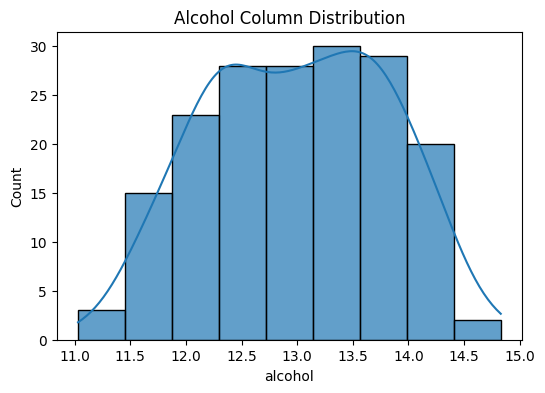

In [17]:
plt.figure(figsize=(6,4))
plt.title("Alcohol Column Distribution")
sns.histplot(wine["alcohol"], kde=True, alpha=0.7)
plt.show()

In [18]:
#H0 -> Data in normally distributed
#Ha -> Data is not normally distributed

#Checking Wheather to accept the null hypothesis or reject it.
sh_stat,sh_p = shapiro(wine["alcohol"])

print("shapiro statistical value : ",sh_stat)
print("shapiro p_value:", sh_p)

alpha = 0.05
if sh_p > alpha:
    print("Data is normally distributes(Accepting H0)")
else:
    print("Data is not normally distributes(Rejecting H0)")

shapiro statistical value :  0.981804609298706
shapiro p_value: 0.020050711929798126
Data is not normally distributes(Rejecting H0)


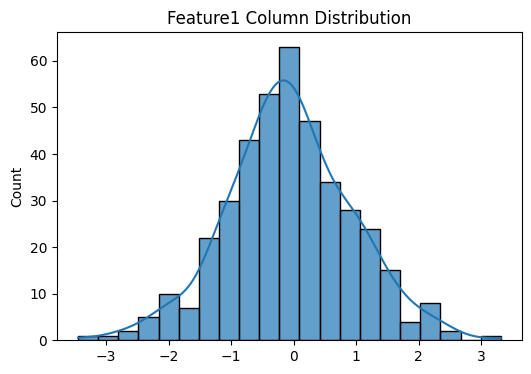

In [23]:
sample = np.random.normal(size = 400)
plt.figure(figsize=(6,4))
plt.title("Feature1 Column Distribution")
sns.histplot(sample, kde=True, alpha=0.7)
plt.show()

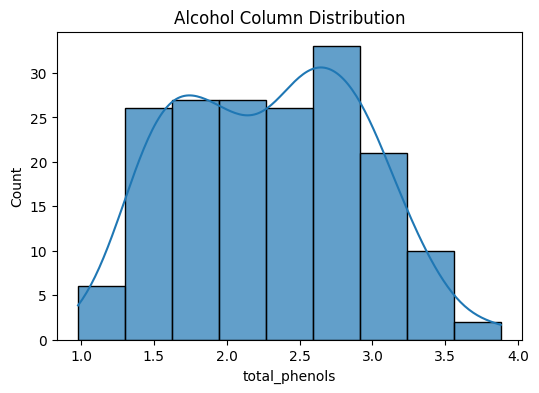

In [24]:
plt.figure(figsize=(6,4))
plt.title("Alcohol Column Distribution")
sns.histplot(wine["total_phenols"], kde=True, alpha=0.7)
plt.show()

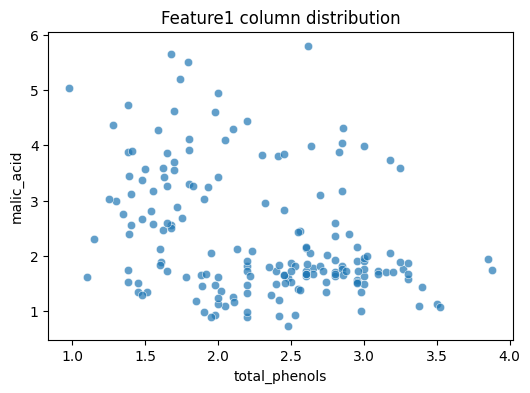

In [28]:
plt.figure(figsize=(6,4))
plt.title("Feature1 column distribution")
sns.scatterplot(x=wine["total_phenols"],y=wine["malic_acid"],alpha=0.7)
plt.show()

In [34]:
#H0 --> Total phenol and malic_acid are independent
#Ha -->Total phenol and malic acid are not independent

#checking weather to accept or reject the null hypothesis
#spearmenr
sp_stats, sp_p = spearmanr(wine["total_phenols"], wine["malic_acid"])

print("spearman statistical value : %.5f" %sp_stats)
print("spearman p_value : %5f" %sp_p)

alpha = 0.05
if sp_p > alpha:
    print("Total phenol and malic_acid are independent(Accepting H0)")
else:
    print("Total phenol and malic_acid are not independent(Rejecting H0)")


spearman statistical value : -0.28022
spearman p_value : 0.000152
Total phenol and malic_acid are not independent(Rejecting H0)


In [35]:
#H0 = --> 
#Ha = -->
sp_stats, sp_p = spearmanr(df["Feature1"], df["Feature2"])

print("spearman statistical value : %.5f" %sp_stats)
print("spearman p_value : %5f" %sp_p)

alpha = 0.05
if sp_p > alpha:
    print("feature1 and Feature2 are dependent(Accepting H0)")
else:
    print("feature1 and Feature2 are independent(Rejecting H0)")



KeyError: 'Feature1'

In [36]:
cat = pd.cut(wine["proanthocyanins"], bins=4, labels=[0,1,2,3])
cat

0      2
1      1
2      3
3      2
4      1
      ..
173    0
174    1
175    1
176    1
177    1
Name: proanthocyanins, Length: 178, dtype: category
Categories (4, int64): [0 < 1 < 2 < 3]

In [37]:
# sequential ---> descrete
#numrical ---> categorical

wine["proanthocyanins"]=cat
#wine.head()

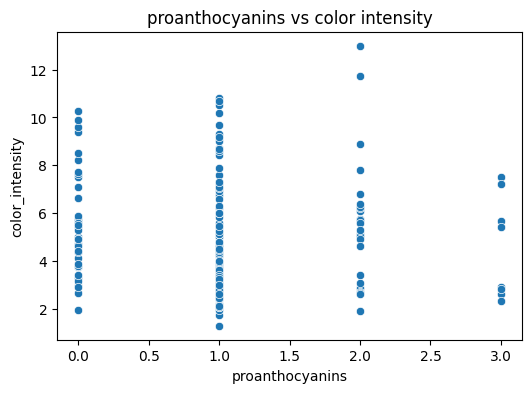

In [39]:
plt.figure(figsize=(6,4))
plt.title ("proanthocyanins vs color intensity")
sns.scatterplot(x=wine["proanthocyanins"], y=wine["color_intensity"])
plt.show()


In [40]:
wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,3,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1,4.32,1.04,2.93,735.0,0


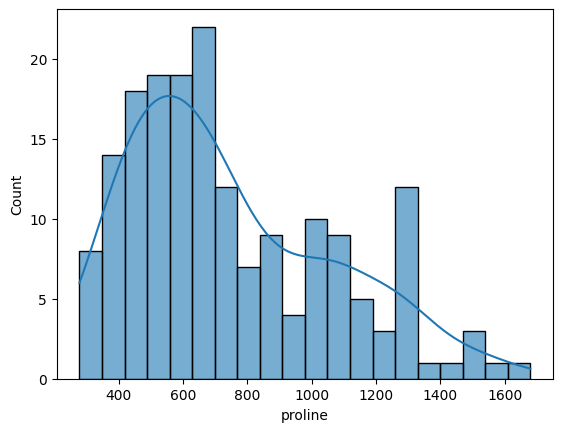

In [43]:
sns.histplot(x=wine["proline"],bins=20, alpha=0.6,legend=False, kde= True)
plt.show()

In [45]:
wine["proline"].mean()

746.8932584269663

In [46]:
sample1=np.random.choice(wine["proline"],size=34)
sample2=np.random.choice(wine["proline"],size=34)

In [48]:
#H0 --> sample1 and sample2 are not equal
#Ha --> sample1 and sample2 are equal

t_stats, t_p = ttest_ind(sample1, sample2)

print("t-test statistical value : %.5f"%t_stats)
print("t_test p value : %.5f"%t_p)

alpha=0.05
if t_p > alpha:
    print(" sample1 and sample2 are not equal(accepting H0)")
else:
    print( "sample1 and sample2 are not equal(rejecting H1)")
    

t-test statistical value : 1.63158
t_test p value : 0.10753
 sample1 and sample2 are not equal(accepting H0)


In [52]:
data={
      "Gender":np.random.choice(["Male","Female"],80),
       "Subject":np.random.choice(["med","eng"],80)       
}

In [53]:
course = pd.DataFrame(data)
course.head(10)

,Gender,Subject
0,Male,med
1,Female,med
2,Male,med
3,Female,eng
4,Female,med
5,Female,eng
6,Female,med
7,Female,med
8,Male,eng
9,Female,med


In [58]:
crstb = pd.crosstab(course["Gender"],course["Subject"])

In [64]:
#H0 --> more males doing medical and females doing engineering
#Ha --> it is not true

chi_stat, chi_p, _,_ = chi2_contingency(crstb)

print("chi2 statastical value : %.5f"%chi_stat)
print("chi2 p value : %.5f"%chi_p)

alpha=0.05
if chi_p>alpha:
     print("more males doing medical and females doing engineering - H0")
else:
     print("it is not true - Ha")

chi2 statastical value : 1.33496
chi2 p value : 0.24792
more males doing medical and females doing engineering - H0
